In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
# Specify the path to the cutomer_data folder in the parent directory
working_directory = "B:/Projects/Marketing Analytics Project/Marketing-Analysis-unimib/"
data_folder_path = "../Data/"

In [3]:
# Read the cutomer_cutomer_cutomer_data file using pandas
customer_accounts_data = pd.read_csv(data_folder_path + "tbl_customer_accounts.csv")
adresses_data = pd.read_csv(data_folder_path + "tbl_addresses.csv")
customer_data = pd.read_csv(data_folder_path + "tbl_customers.csv")
orders_data = pd.read_csv(data_folder_path + "tbl_orders.csv")
products_data = pd.read_csv(data_folder_path + "tbl_products.csv")
customer_reviews_data = pd.read_csv(data_folder_path + "tbl_customer_reviews.csv")
labelled_reviews_data = pd.read_csv(data_folder_path + "tbl_labelled_reviews.csv")

# Customers

In [4]:
customer_data.shape

(140946, 8)

In [5]:
customer_data.head()

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
0,891057,863914,2001-10-22,F,NaN,yahoo.it,1.0,True
1,655484,639856,2001-04-30,M,NaN,yahoo.it,1.0,False
2,514958,494806,2001-01-01,M,NaN,libero.it,1.0,True
3,398355,377261,2000-03-09,M,NaN,gmail.com,1.0,True
4,23808,20227,1999-11-21,F,NaN,virgilio.it,1.0,True


In [6]:
customer_data.tail()

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
140941,449222,428121,1945-05-30,F,NaN,libero.it,1.0,True
140942,368113,346970,1943-11-18,F,NaN,yahoo.com,1.0,True
140943,424451,403292,1943-05-07,F,NaN,gmail.com,1.0,True
140944,808137,789737,1943-02-13,F,NaN,yahoo.it,1.0,True
140945,442860,421749,1940-05-18,F,NaN,gmail.com,1.0,True


In [45]:
customer_data['email_provider'].value_counts()

email_provider
gmail.com                       58494
libero.it                       21668
hotmail.it                      10988
alice.it                         7098
yahoo.it                         6300
                                ...  
personal_mail_provider_4441         1
personal_mail_provider_12321        1
personal_mail_provider_14426        1
personal_mail_provider_20142        1
personal_mail_provider_17261        1
Name: count, Length: 8484, dtype: int64

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140946 entries, 0 to 140945
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_id          140946 non-null  int64  
 1   address_id           140946 non-null  int64  
 2   birthdate            140946 non-null  object 
 3   gender               140946 non-null  object 
 4   job_type             4295 non-null    object 
 5   email_provider       139111 non-null  object 
 6   flag_phone_provided  129675 non-null  float64
 7   flag_privacy         140946 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 7.7+ MB


## Customer ID - Address ID
- Some Addresses have been used by up to 3 customers (They are supposedly a family/roommates/residents of the same appartement)
- There is a Address Id used 2000 times and is a missing value in Addresses table. => Addresses are not missing in this table but must be checked with the other table to see if there are any truly missing ones.
- 2155 customers with Address ids which have no address info in the addresses table

In [8]:
customer_data['customer_id'].unique().shape[0]

140946

In [9]:
# Calculate minimum value of the 'customer_id' column
min_value = customer_data['customer_id'].min()

# Calculate maximum value of the 'customer_id' column
max_value = customer_data['customer_id'].max()

# Optionally, you can print these values
print(f"Minimum: {min_value}, Maximum: {max_value}")

Minimum: 23, Maximum: 934879


There are addresses with multiple customers

In [10]:
print(f"The number of unique customer_id values is {customer_data['customer_id'].unique().shape[0]}")

print(f"The number of unique address_id values is {customer_data['address_id'].unique().shape[0]}")

print(f"The number of unique customer rows is {customer_data.drop_duplicates().shape[0]}")

The number of unique customer_id values is 140946
The number of unique address_id values is 138648
The number of unique customer rows is 140946


ID 900091 has been repeated 2102 times which is an anomly

In [11]:
customer_data.groupby('address_id').size().sort_values(ascending=False)

address_id
900091    2102
745497       3
590725       2
465404       2
432307       2
          ... 
316732       1
316711       1
316710       1
316706       1
443267       1
Length: 138648, dtype: int64

In [12]:
customer_data[customer_data['address_id'] == 900091].head()

,customer_id,address_id,birthdate,gender,job_type,email_provider,flag_phone_provided,flag_privacy
37,501387,900091,1997-02-25,M,NaN,virgilio.it,1.0,True
44,869732,900091,1996-12-16,M,NaN,libero.it,1.0,True
80,865261,900091,1996-02-01,F,NaN,gmail.com,1.0,True
139,866378,900091,1995-01-07,F,NaN,libero.it,1.0,True
185,871403,900091,1994-05-12,F,NaN,hotmail.it,1.0,True


The value is null and must be considered as a missing value.

In [13]:
adresses_data[adresses_data['address_id'] == 900091]

,address_id,postal_code,district,region


Let's compare addresses and customers to evaluate the addresses and its accuracy

In [14]:
customer_addresses_joined_data = customer_data[['customer_id', 'address_id']].merge(adresses_data, on='address_id', how='left')

Missing data on addresses
There Are 53 address ids that are missing data in the addresses table and thus are not usable.

In [15]:
customers_missing_address = customer_addresses_joined_data[customer_addresses_joined_data[['postal_code', 'district', 'region']].isnull().all(axis=1)]
unique_missing_addresses = customers_missing_address['address_id'].unique()
unique_missing_addresses.shape[0]

53

In [16]:
customer_data['address_id'].isin(unique_missing_addresses).sum()

2155

In [60]:
adresses_data.sample(5)

,address_id,postal_code,district,region
150366,575043,46044.0,MN,LOMBARDIA
32501,452629,30174.0,VE,VENETO
83020,419110,81039.0,CE,CAMPANIA
196490,211316,65010.0,PE,ABRUZZO
12520,238618,36040.0,VI,VENETO


# Customer Account

In [51]:
customer_accounts_data.shape

(169494, 6)

In [62]:
customer_accounts_data[customer_accounts_data['customer_id'].value_counts() > 1]

C:\Users\BlackDEATH\AppData\Local\Temp\ipykernel_12912\2887972593.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer_accounts_data[customer_accounts_data['customer_id'].value_counts() > 1]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [58]:
customer_accounts_data['account_id'].value_counts()

account_id
774557    3
373919    2
111470    2
14985     2
826014    2
         ..
369815    1
369969    1
369819    1
369821    1
839535    1
Name: count, Length: 169086, dtype: int64

In [59]:
customer_accounts_data[customer_accounts_data['account_id'] == 774557]

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
123527,760880,774557,36,premium,1,2023-01-28
124271,801565,774557,36,premium,1,2023-01-28
127801,826836,774557,36,premium,1,2023-01-28


In [56]:
customer_accounts_data[customer_accounts_data['customer_id'] == 859327]

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
134125,859327,849495,24,business premium,0,2023-03-15
134126,859327,849532,24,business premium,0,2023-03-15
134127,859327,849542,24,business standard,1,2023-03-15


In [47]:
customer_accounts_data[customer_accounts_data['loyatlty_status'] == 0]

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
38,21750,155594,20,premium,0,2022-03-13
457,106366,424,47,business standard,0,2022-01-02
523,106937,1007,47,standard,0,2022-01-02
668,102670,2852,46,standard,0,2022-01-03
718,108013,2111,7,premium,0,2022-01-03
...,...,...,...,...,...,...
168948,871366,856504,21,standard,0,2023-03-18
169274,899702,887777,49,business standard,0,2023-04-05
169278,487516,424599,1,standard,0,2022-07-21
169405,905490,894316,24,standard,0,2023-04-08


# Products
- No names for the Products
- 14 classes of products / 88538 number of products

In [26]:
products_data.shape

(88538, 2)

In [25]:
products_data.head()

,product_id,product_class
0,35996051,9
1,35980371,14
2,31276196,4
3,31276224,4
4,31456495,4


In [30]:
products_data['product_id'].unique().shape[0]

88538

In [35]:
products_data['product_class'].value_counts().sort_index()

product_class
1      2203
2      4105
3      7326
4      5945
5      2528
6      3340
7      9974
8      2241
9     13325
10     9845
11     6690
12    13893
13     5283
14     1840
Name: count, dtype: int64

# Orders

In [36]:
orders_data.shape

(1039865, 8)

In [37]:
orders_data.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851


In [41]:
# Assuming your DataFrame is called "data"
dates = pd.to_datetime(orders_data['purchase_datetime']).dt.date

# calculate the range of the entire dataset for the column purchase_datetime
purchase_datetime_range = dates.max() - dates.min()
purchase_datetime_range

datetime.timedelta(days=364)

# Samples

In [17]:
customer_accounts_data.head(10)

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
0,9557,746573,9,premium,1,2023-01-11
1,743090,776971,2,premium,1,2023-01-30
2,813156,791681,45,premium,1,2023-02-08
3,843392,825439,1,premium,1,2023-03-01
4,20476,815010,16,premium,1,2023-02-23
5,770374,814968,10,premium,1,2023-02-23
6,834288,815151,47,premium,1,2023-02-23
7,803528,780986,20,premium,1,2023-02-02
8,783266,814734,34,premium,1,2023-02-23
9,833948,814712,22,premium,1,2023-02-23


In [18]:
customer_accounts_data.tail(10)

,customer_id,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date
169484,847148,829643,23,standard,1,2023-03-03
169485,884402,870527,9,standard,1,2023-03-25
169486,7865,780242,9,business premium,1,2023-02-01
169487,540836,485279,24,standard,1,2022-08-24
169488,362172,281597,32,business standard,1,2022-05-09
169489,828458,895971,47,standard,1,2023-04-09
169490,575891,525794,1,standard,1,2022-09-14
169491,316991,231471,14,standard,1,2022-04-15
169492,403638,329448,1,standard,1,2022-05-31
169493,856065,839535,13,standard,1,2023-03-09


# Size and Range

In [19]:
customer_accounts_data.shape

(169494, 6)

In [20]:
customer_accounts_data.describe()

,customer_id,account_id,favorite_store,loyatlty_status
count,169494.000000,169494.000000,169494.000000,169494.000000
mean,453477.476807,454051.698202,22.794506,0.992153
std,260804.531519,253823.105754,15.601191,0.088235
min,16.000000,3.000000,1.000000,0.000000
25%,233721.500000,246909.250000,7.000000,1.000000
50%,455237.500000,450119.500000,24.000000,1.000000
75%,670383.750000,664456.000000,37.000000,1.000000
max,934892.000000,928121.000000,49.000000,1.000000


No Missing data in the consumer data

In [21]:
customer_accounts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169494 entries, 0 to 169493
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   customer_id      169494 non-null  int64 
 1   account_id       169494 non-null  int64 
 2   favorite_store   169494 non-null  int64 
 3   loyalty_type     169494 non-null  object
 4   loyatlty_status  169494 non-null  int64 
 5   activation_date  169494 non-null  object
dtypes: int64(4), object(2)
memory usage: 7.8+ MB


In [22]:
customer_accounts_data['customer_id'].duplicated().sum()

310

In [23]:
customer_accounts_data[['customer_id', 'account_id']].duplicated().sum()

0

# Product Analysis

## Most Sold Products

We ignore the refunds for this analysis

In [9]:
data = orders_data[orders_data['direction'] == 1]

### General
What are the most sold products among all the data?

In [10]:
data.head()

,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime
0,8fe4346b53d0c781b275a614175804de,23,49,35551922,1,125.40,0.0,2022-10-04T182851
1,8fe4346b53d0c781b275a614175804de,23,49,30344384,1,8.30,0.0,2022-10-04T182851
2,8fe4346b53d0c781b275a614175804de,23,49,33794292,1,1.99,0.0,2022-10-04T182851
3,8fe4346b53d0c781b275a614175804de,23,49,33795776,1,5.10,0.0,2022-10-04T182851
4,8fe4346b53d0c781b275a614175804de,23,49,36235381,1,76.05,0.0,2022-10-04T182851


In [24]:
top_sold_products_general = data.groupby('product_id').size().sort_values(ascending=False).head().index
top_sold_products_general

Index([33700716, 33817091, 48011971, 48020504, 34843564], dtype='int64', name='product_id')

What are the products that their sum of gross price are in the top 5 in all orders?

In [25]:
top_sold_high_gross_products_general = data.groupby('product_id')['gross_price'].sum().sort_values(ascending=False).head().index
top_sold_high_gross_products_general

Index([48011971, 48020504, 48010340, 48019433, 48500403], dtype='int64', name='product_id')

In [27]:
top_sold_products_general.intersection(top_sold_high_gross_products_general)

Index([48011971, 48020504], dtype='int64', name='product_id')

In [33]:
data.groupby('product_id').size()

product_id
504553      248
30033521    210
30044455    403
30062452    239
30072014    244
           ... 
82040488    211
82042962    248
82042965    221
82042968    243
82042974    230
Length: 2000, dtype: int64

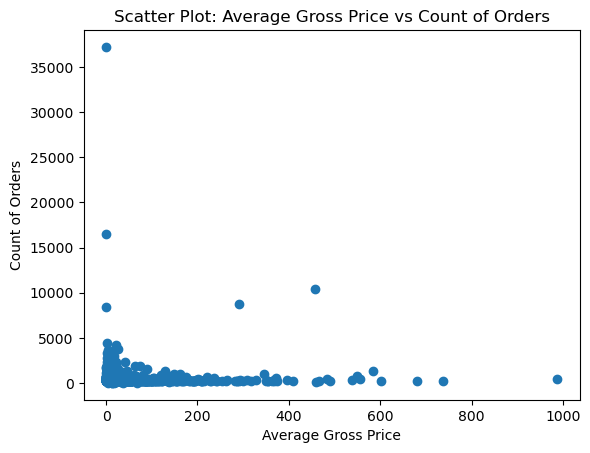

In [35]:
# Calculate the sum of orders for each item
item_prices = data.groupby('product_id')['gross_price'].mean()

# Calculate the sum of orders for each item
item_purchase_count = data.groupby('product_id').size()

# Create a DataFrame with the gross price and sum of orders for each item
item_data = pd.DataFrame({'Item_id': item_purchase_count.index, 'orders_count': item_purchase_count.values})

# join the item_data DataFrame with the item_prices series
item_data = item_data.merge(item_prices, left_on='Item_id', right_index=True)

# Plot the scatter plot
plt.scatter(item_data['gross_price'], item_data['orders_count'])
plt.xlabel('Average Gross Price')
plt.ylabel('Count of Orders')
plt.title('Scatter Plot: Average Gross Price vs Count of Orders')
plt.show()